In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from scipy import stats

In [2]:
df = pd.read_csv("Crashes_in_DC.csv")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_detail = pd.read_csv("Crash_Details_Table.csv")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.REPORTDATE = pd.to_datetime(df.REPORTDATE)
df.FROMDATE = pd.to_datetime(df.FROMDATE)
df.TODATE = pd.to_datetime(df.TODATE)

In [5]:
df["report_second"] = df.REPORTDATE.apply(lambda date: date.second)
df["report_minute"] = df.REPORTDATE.apply(lambda date: date.minute)
df["report_hour"] = df.REPORTDATE.apply(lambda date: date.hour)
df["report_month"] = df.REPORTDATE.apply(lambda date: date.month)
df["report_year"] = df.REPORTDATE.apply(lambda date: date.year)
df["report_date"] = df.REPORTDATE.apply(lambda date: date.date)
df["report_day_of_week"] = df.REPORTDATE.apply(lambda date: date.dayofweek)
df["quadrant"] = df.ADDRESS.str.extract(r" ([NS][WE])\b")
df["ward"] = df.WARD.str.extract(r"([1-8])")
df["weekend"] = df.report_day_of_week >=5

In [6]:
df_merged = pd.merge(df, df_detail, how="right", on="CRIMEID")
df_merged = df_merged.loc[~((df_merged.report_hour==5) & (df_merged.report_minute==0) & (df_merged.report_second==0))]
df_merged = df_merged.loc[((df_merged.report_year>2015)&(df_merged.report_year<=2019))]

In [7]:
df_merged.shape

(166403, 78)

In [8]:
df_merged.loc[df_merged.AGE<=13] = np.nan

In [9]:
df = df.loc[((df.report_year>2015)&(df.report_year<=2019))]

In [10]:
df.ward.value_counts()

2    20603
5    13911
6    13684
7    12159
8    11257
1     7531
4     7207
3     4916
Name: ward, dtype: int64

In [11]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE',
       'MPDGEOX', 'MPD

In [12]:
df.head().T

,3,11,12,15,19
X,-76.9282,-77.0152,-77.0507,-77.0224,-77.0043
Y,38.8903,38.8998,38.9221,38.9119,38.9088
OBJECTID,96413471,96413479,96413480,96413483,96413487
CRIMEID,27133521,27133532,27133533,27133536,27133540
CCN,16198580,16194624,16198574,16198592,16198591
REPORTDATE,2016-11-22 13:31:23+00:00,2016-11-22 13:58:23+00:00,2016-11-22 14:00:30+00:00,2016-11-22 14:16:22+00:00,2016-11-22 14:06:33+00:00
ROUTEID,47035472,11059602,11020992,47081752,12036722
MEASURE,160.325,593.141,53.95,85.954,465.43
OFFSET,0,0,0,0,0
STREETSEGID,-9,9004,5542,-9,5265


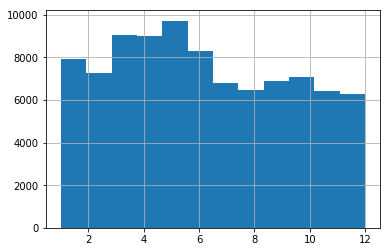

In [13]:
df.report_month.hist(bins=12)
plt.show()

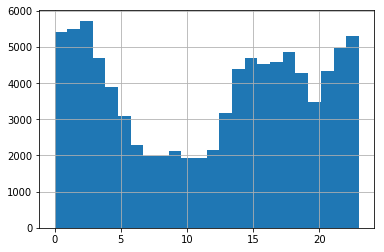

In [14]:
df_except_five_oclock = df.loc[~((df.report_hour==5) & (df.report_minute==0) & (df.report_second==0))]
df_except_five_oclock.report_hour.hist(bins=24)
plt.show()

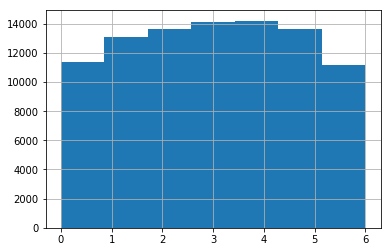

In [15]:
day_of_week = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
df_except_five_oclock.report_day_of_week.hist(bins=7)
plt.show()

In [16]:
df.quadrant.value_counts()

NW    41175
NE    22927
SE    18115
SW     3112
Name: quadrant, dtype: int64

In [17]:
df.groupby("quadrant")[["X", "Y"]].agg(["max","min"])

X                     Y           
                max        min        max        min
quadrant                                            
NE       -76.909549 -77.056082  38.970359  38.872437
NW       -76.939845 -77.116031  38.992847  38.870752
SE       -76.911472 -77.034903  38.919263  38.818379
SW       -76.981401 -77.055360  38.905660  38.808889

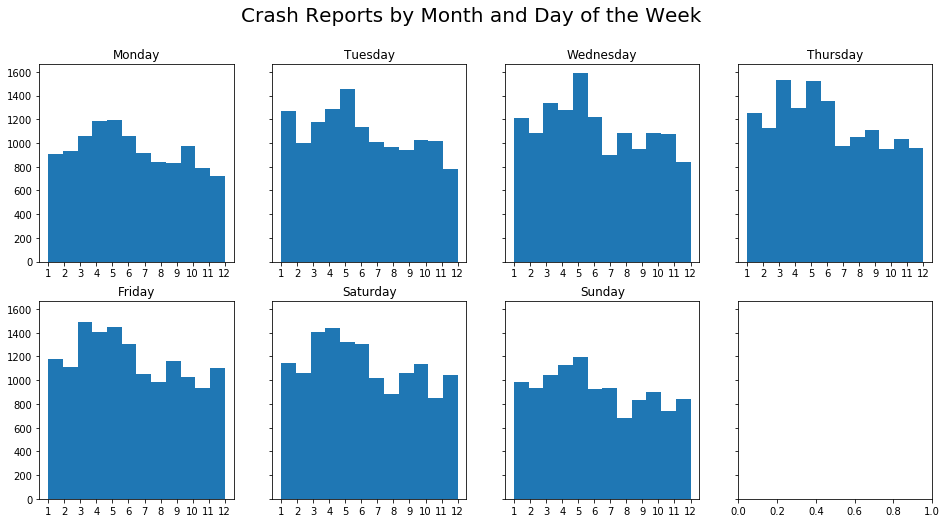

In [18]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Crash Reports by Month and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df.loc[df.report_day_of_week==i,"report_month"], bins=12)
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(1,13))

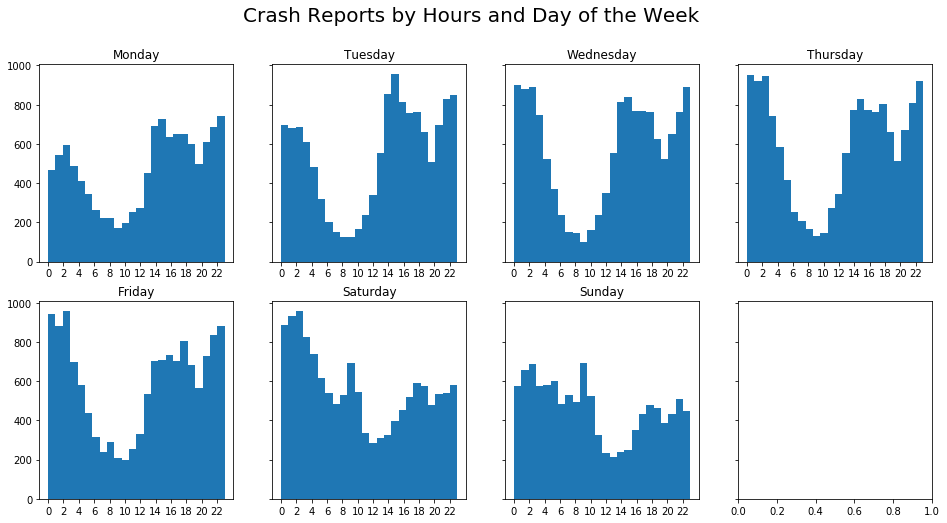

In [19]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Crash Reports by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df_except_five_oclock.loc[df_except_five_oclock.report_day_of_week==i,"report_hour"], bins=24)
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

In [20]:
quadrants = ["NW", "NE", "SE", "SW"]

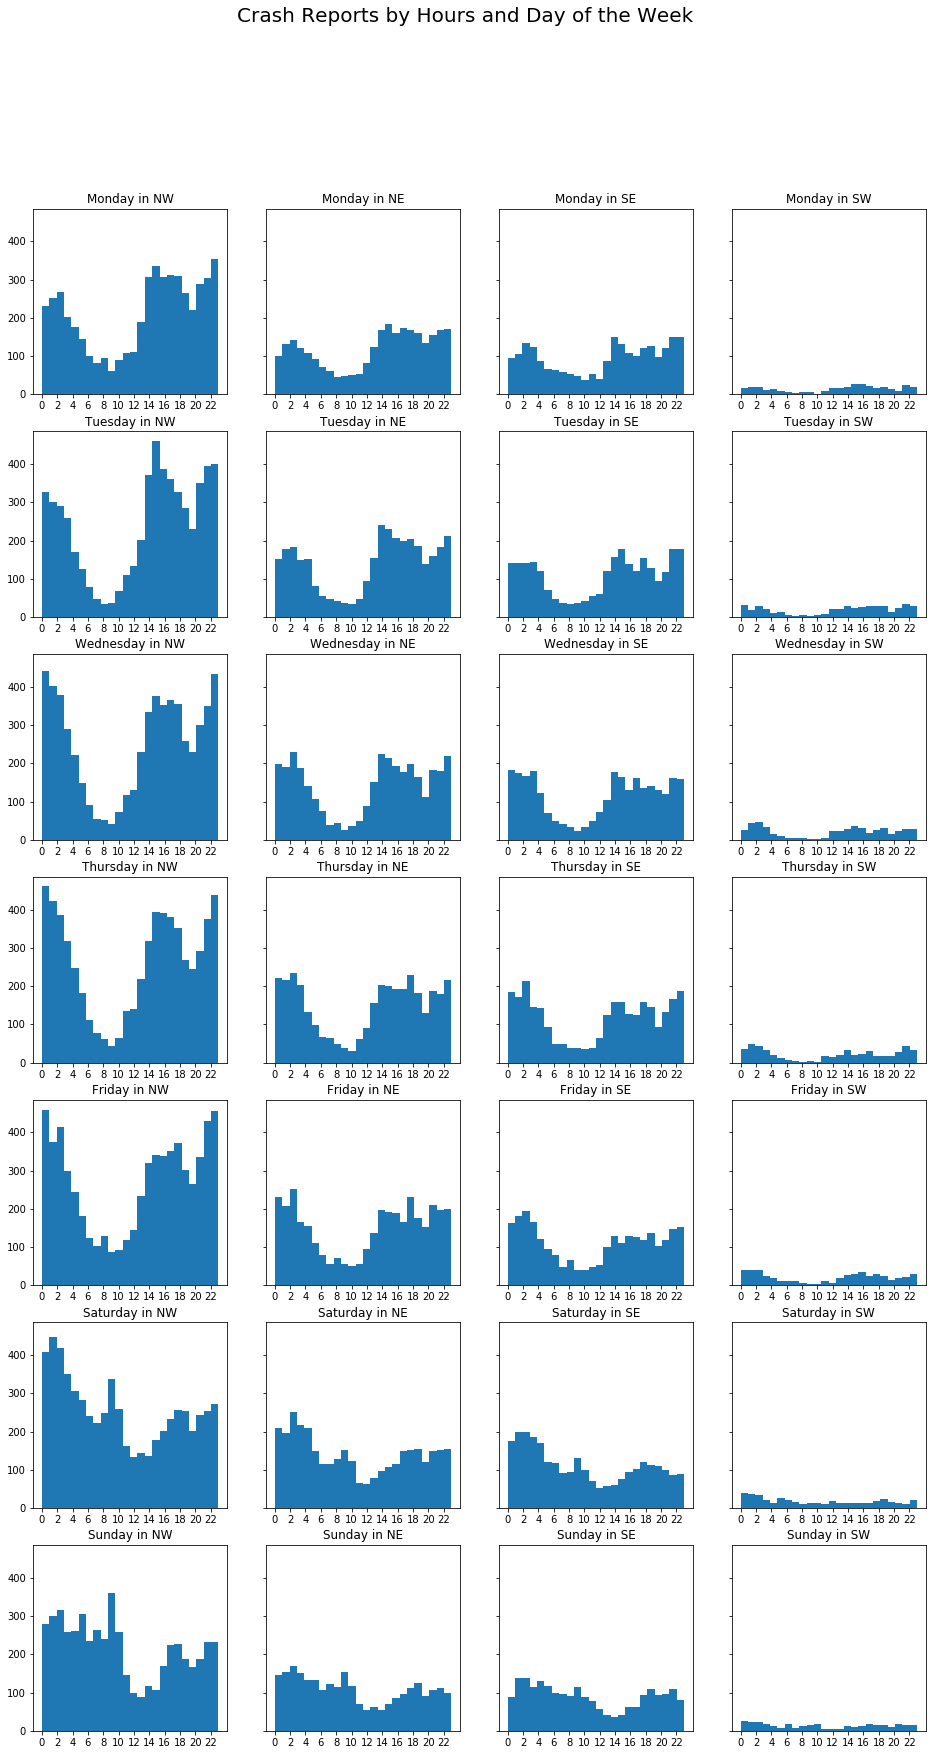

In [21]:
fig, ax = plt.subplots(7,4, sharey=True, figsize=(16,28))
fig.suptitle("Crash Reports by Hours and Day of the Week", fontsize=20)
for i in range(28):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df_except_five_oclock.loc[(df_except_five_oclock.report_day_of_week==row)&(df_except_five_oclock.quadrant==quadrants[col]),"report_hour"], bins=24)
    ax[row, col].title.set_text(day_of_week[row]+" in "+quadrants[col])
    ax[row, col].set_xticks(range(0, 24, 2))

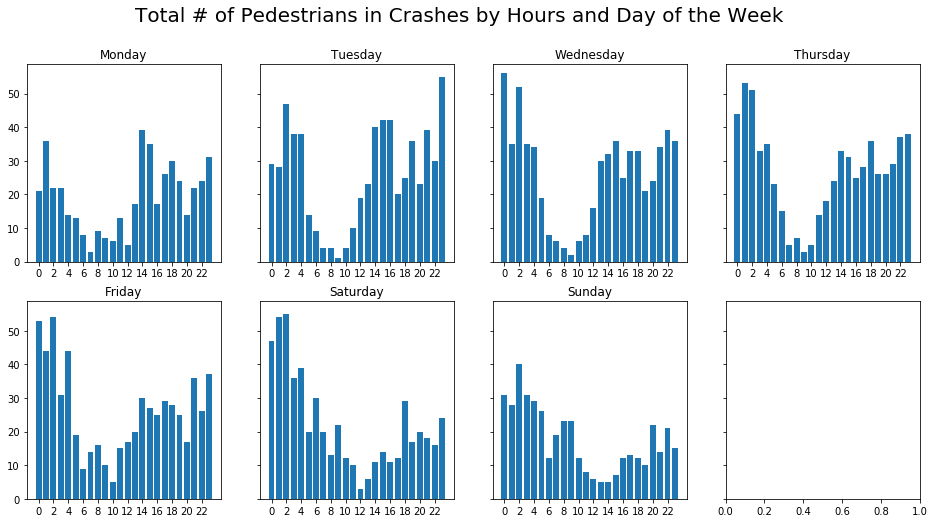

In [22]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_PEDESTRIANS", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Pedestrians in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

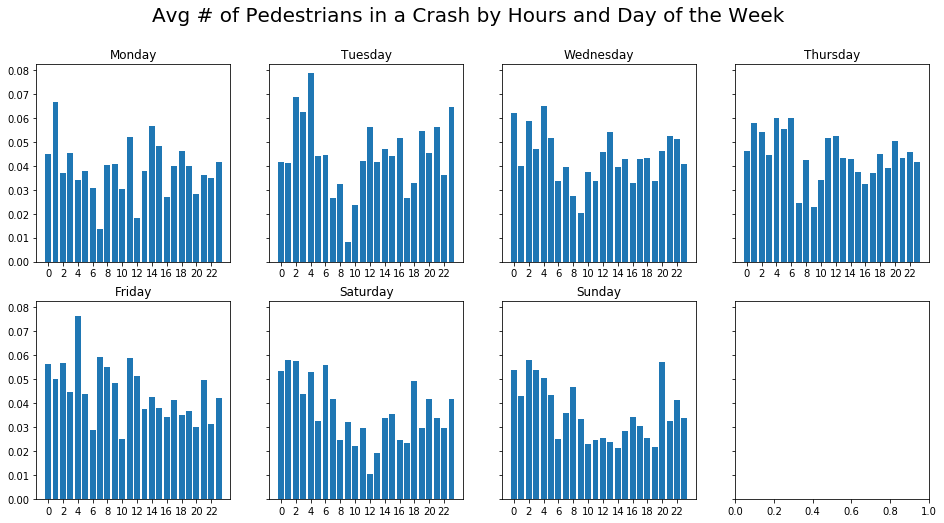

In [23]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_PEDESTRIANS", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Pedestrians in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

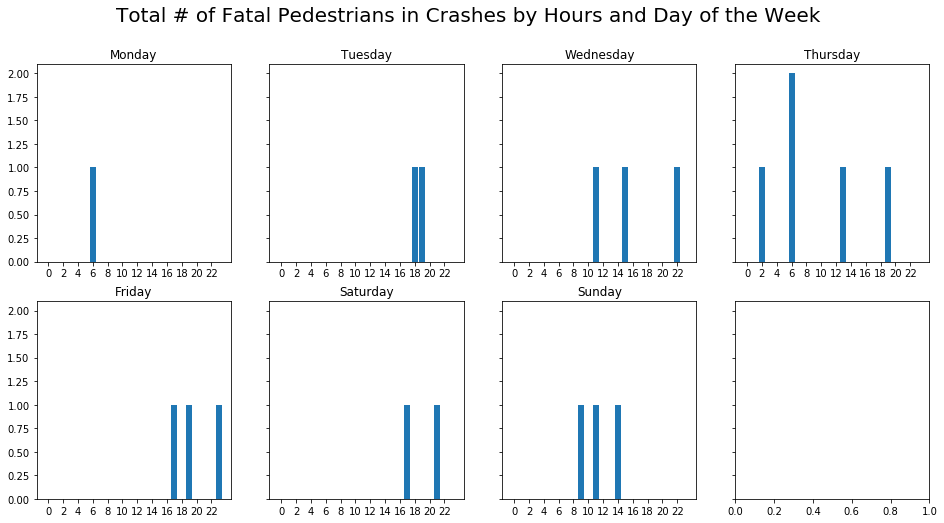

In [24]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_PEDESTRIAN", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Pedestrians in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

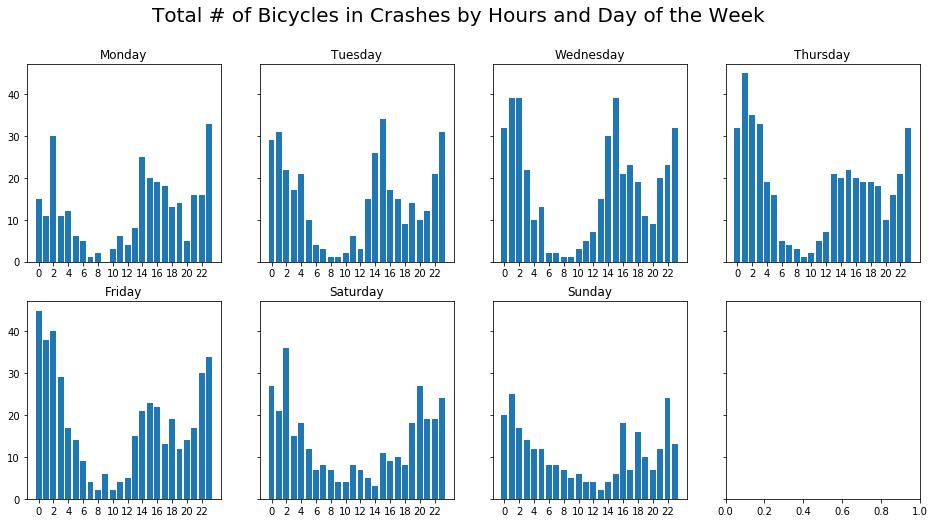

In [25]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_BICYCLES", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Bicycles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

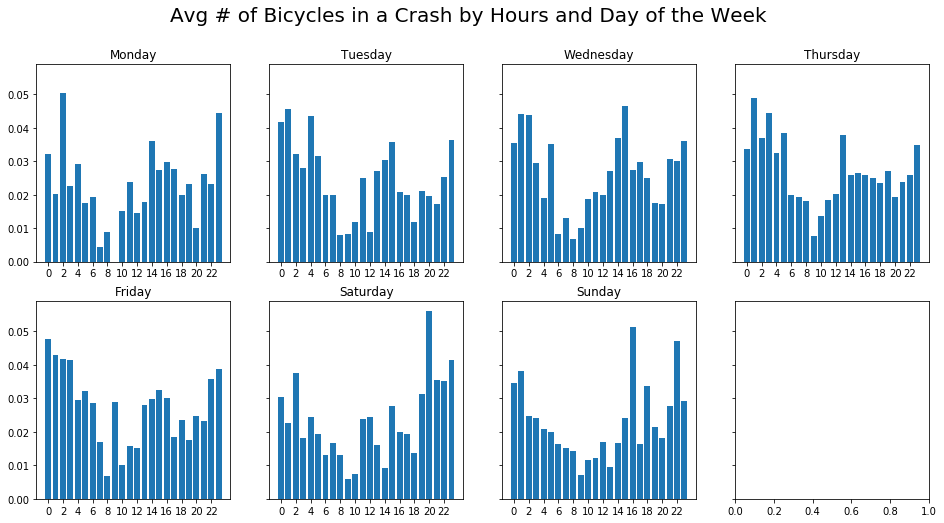

In [26]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_BICYCLES", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Bicycles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

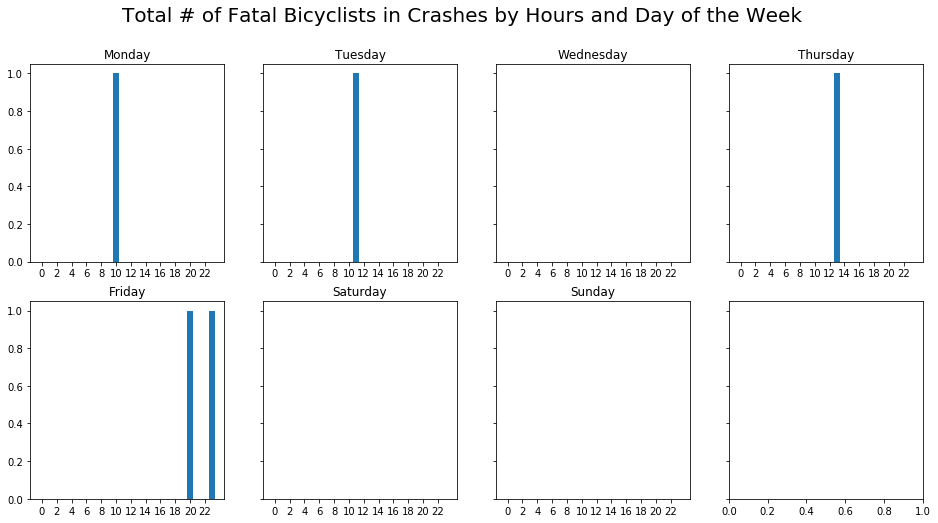

In [27]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_BICYCLIST", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Bicyclists in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

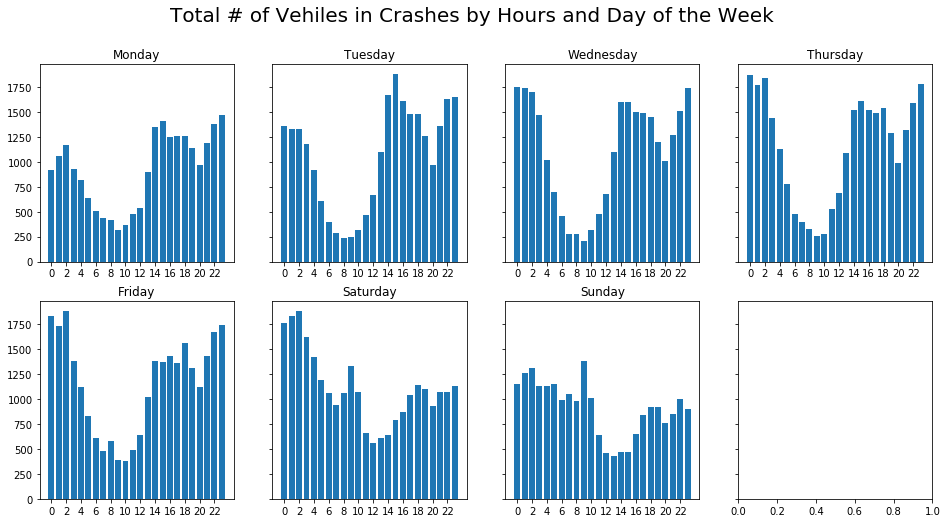

In [28]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_VEHICLES", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Vehiles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

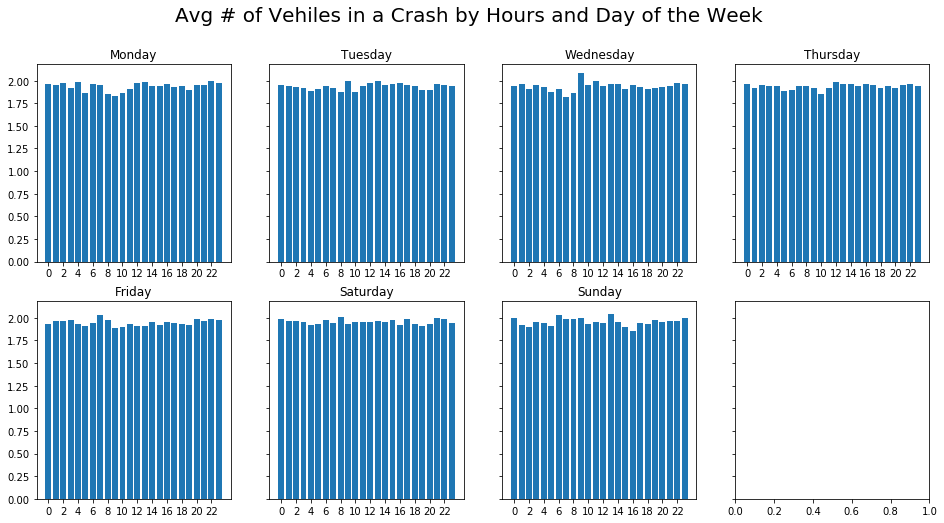

In [29]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_VEHICLES", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Vehiles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

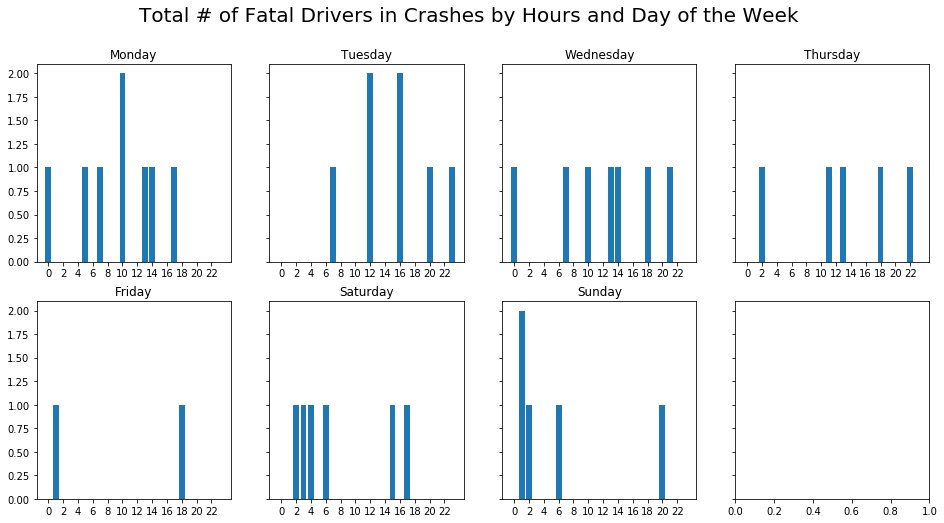

In [30]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_DRIVER", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Drivers in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

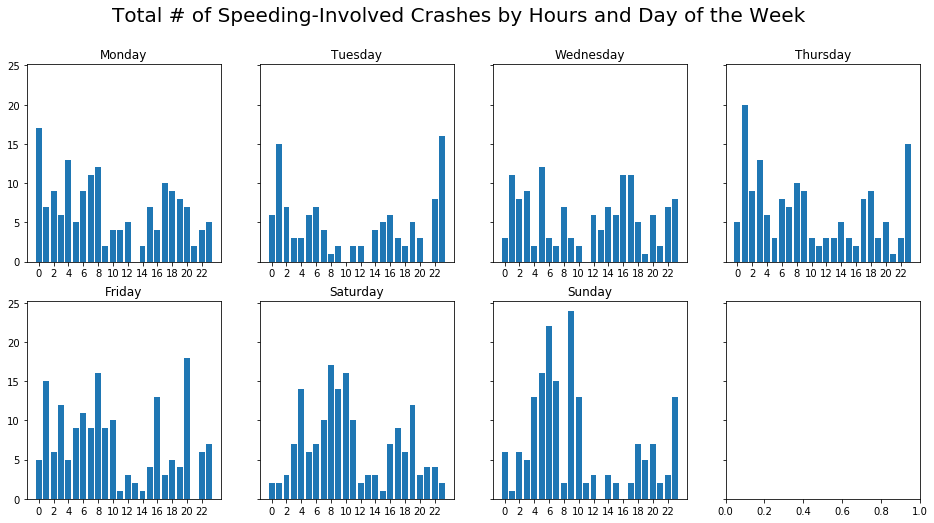

In [31]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="SPEEDING_INVOLVED", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

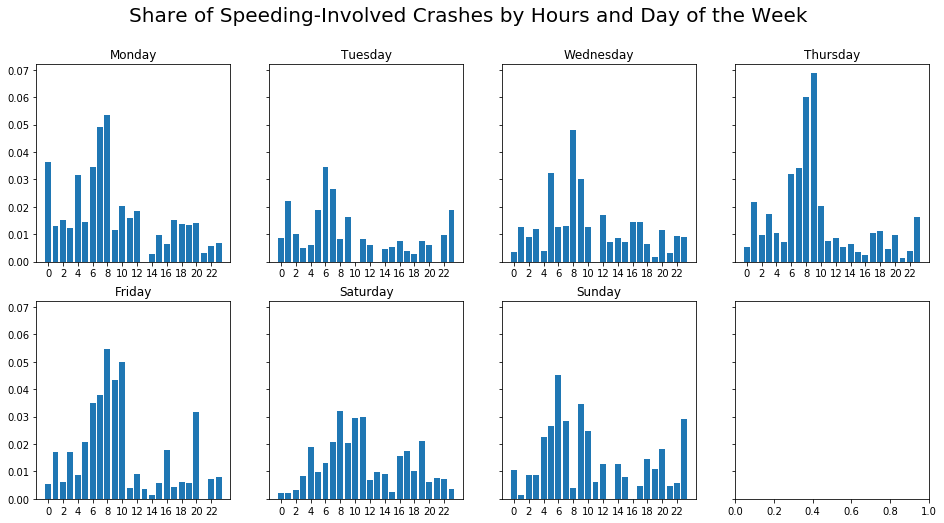

In [32]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="SPEEDING_INVOLVED", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

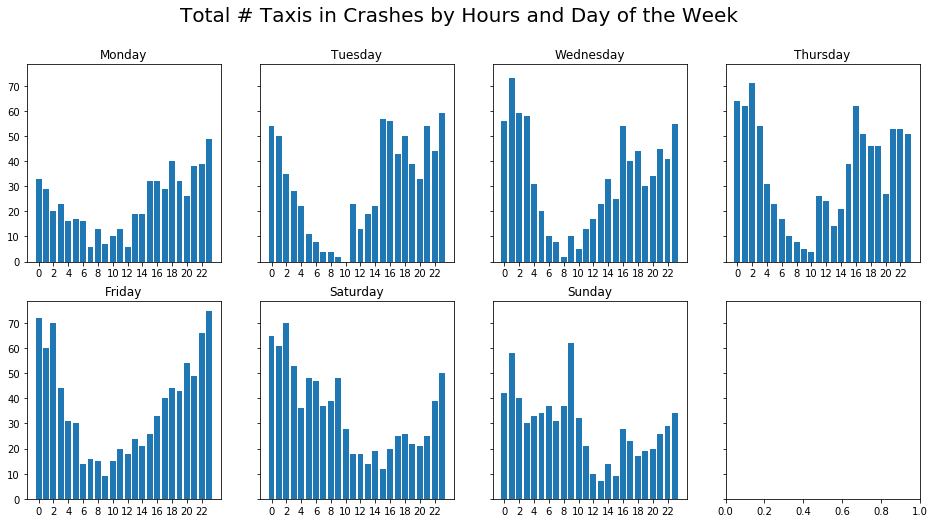

In [33]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_TAXIS", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # Taxis in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

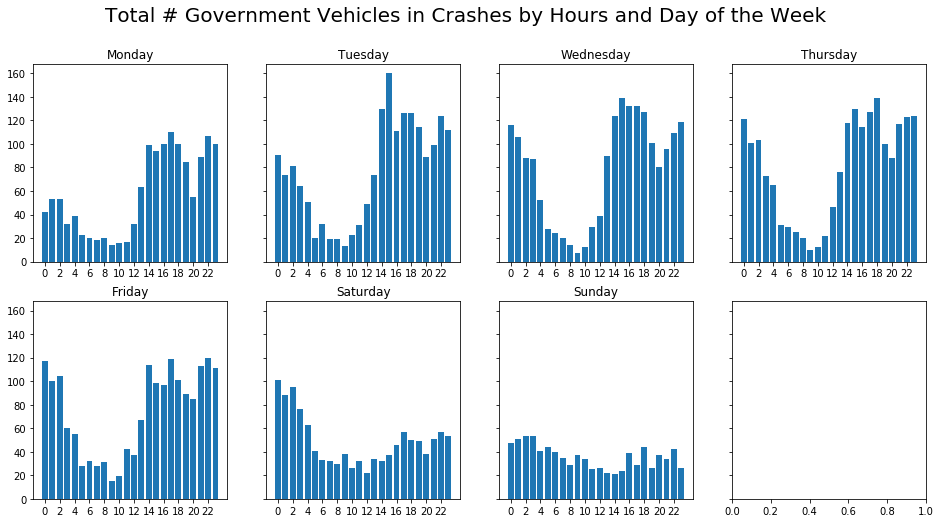

In [34]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_GOVERNMENT", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # Government Vehicles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

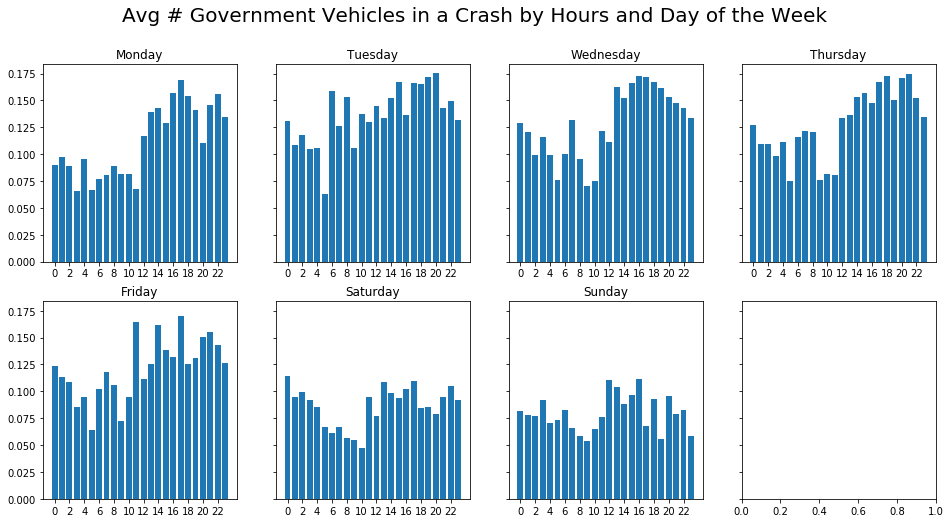

In [35]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_GOVERNMENT", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # Government Vehicles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

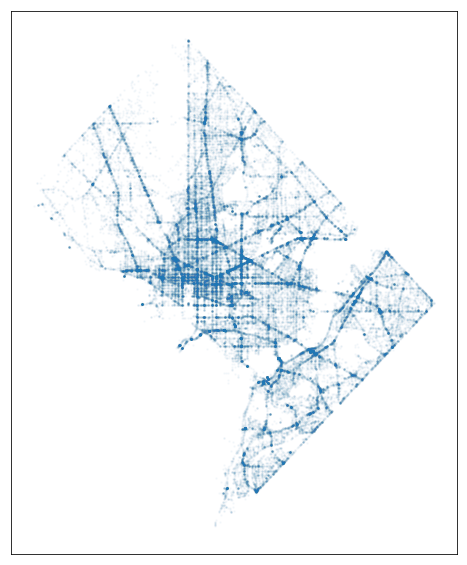

<Figure size 432x288 with 0 Axes>

In [36]:
fig = plt.figure(figsize=(8,10))
fig.set_alpha(0.0)
plt.scatter(df_except_five_oclock.X, df_except_five_oclock.Y, alpha=0.03, s=2)
plt.xticks([])
plt.yticks([])

plt.figure()
plt.show()

In [37]:
m = Basemap(-77.12, 38.8, -76.9, 39, projection='merc')

In [38]:
x, y = m(df_except_five_oclock.X.tolist(), df_except_five_oclock.Y.tolist())

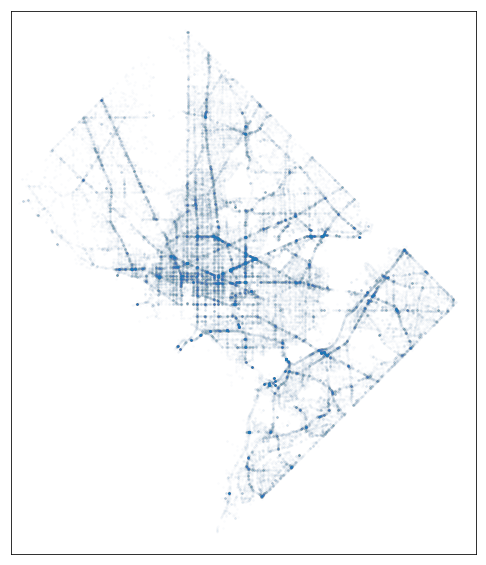

In [39]:
plt.figure(figsize=(12,10))
m.scatter(x, y, s=3, alpha=0.01)

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


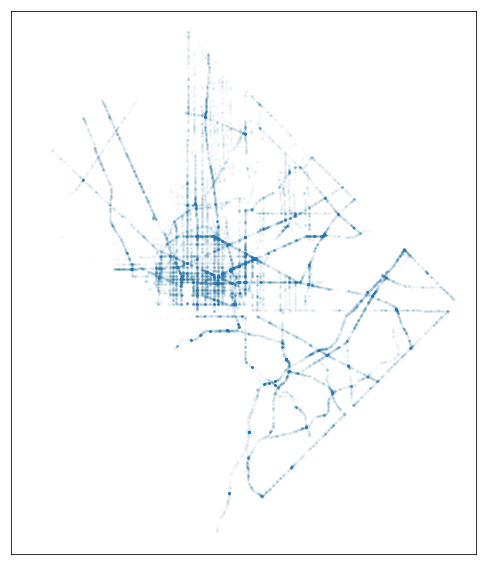

In [40]:
df_except_five_oclock.loc[:, "major_route"] = df_except_five_oclock.ROUTEID.isin(list(df_except_five_oclock.ROUTEID.value_counts().head(100).index))
df_major_route = df_except_five_oclock[df_except_five_oclock.ROUTEID.isin(list(df_except_five_oclock.ROUTEID.value_counts().head(100).index))]
plt.figure(figsize=(12,10))
x, y = m(df_major_route.X.tolist(), df_major_route.Y.tolist())
m.scatter(x, y, s=3, alpha=0.02)
fig.patch.set_alpha(0)


In [41]:
x1, y1 = m(df_except_five_oclock.loc[df_except_five_oclock.weekend, "X"].tolist(), df_except_five_oclock.loc[df_except_five_oclock.weekend, "Y"].tolist())
x2, y2 = m(df_except_five_oclock.loc[df_except_five_oclock.weekend==False, "X"].tolist(), df_except_five_oclock.loc[df_except_five_oclock.weekend==False, "Y"].tolist())

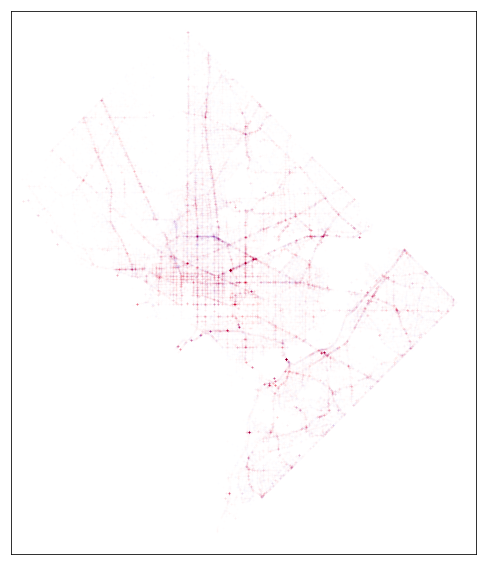

In [42]:
plt.figure(figsize=(12,10))
m.scatter(x1, y1, s=3, alpha=0.005, c="blue")
m.scatter(x2, y2, s=3, alpha=0.005, c="red")

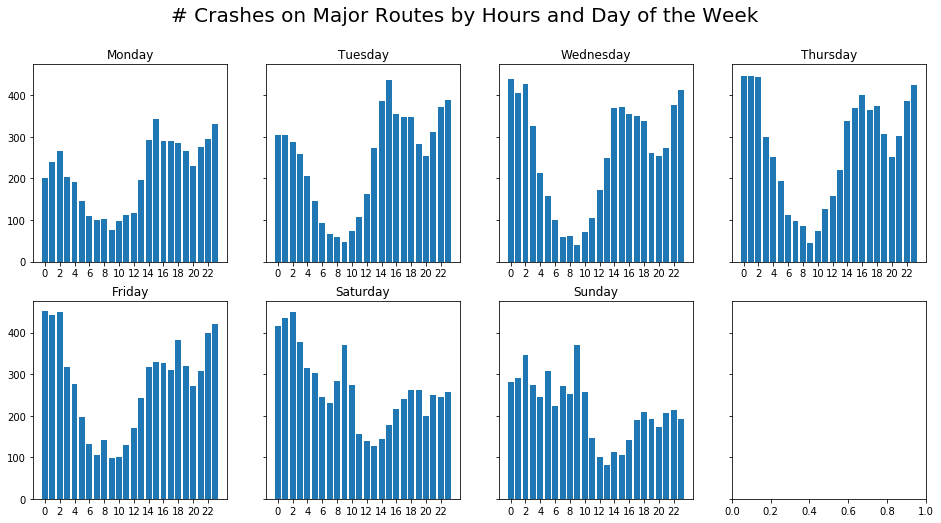

In [43]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="major_route", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("# Crashes on Major Routes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

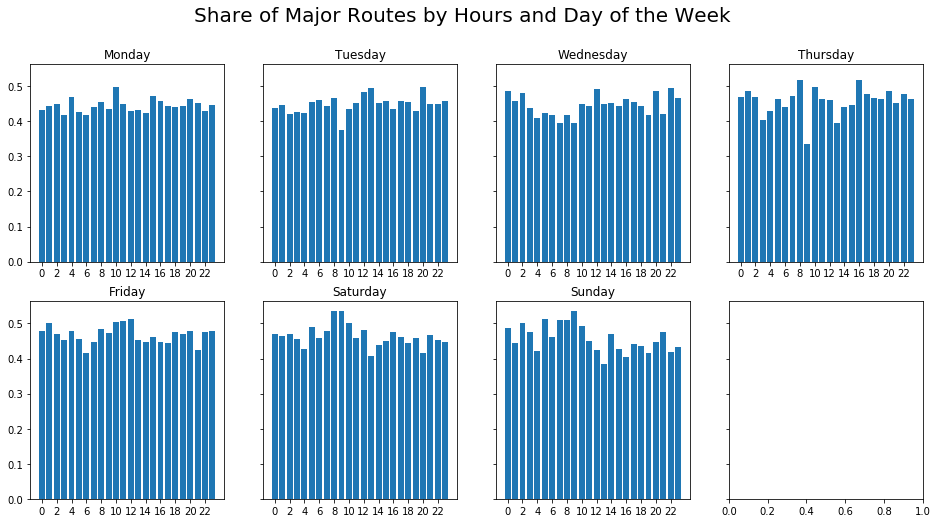

In [44]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="major_route", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Major Routes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

In [45]:
df_except_five_oclock["log_off_intersection"] = df_except_five_oclock.OFFINTERSECTION.apply(lambda x: np.nan if (x<=0 or x>10000) else np.log10(x))

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_except_five_oclock["log_off_intersection"].describe()

count    84296.000000
mean         1.267260
std          0.829614
min         -2.963770
25%          1.090368
50%          1.450151
75%          1.729204
max          3.987974
Name: log_off_intersection, dtype: float64

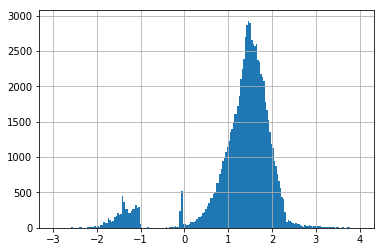

In [47]:
df_except_five_oclock["log_off_intersection"].hist(bins=200)

In [48]:
df_except_five_oclock.log_off_intersection = df_except_five_oclock.log_off_intersection.apply(lambda x: x if x>=0 else np.nan)

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


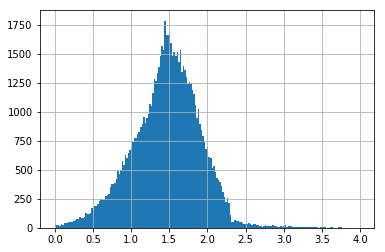

In [49]:
df_except_five_oclock["log_off_intersection"].hist(bins=200)

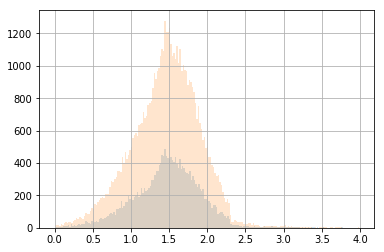

In [50]:
df_except_five_oclock.loc[df_except_five_oclock.weekend, "log_off_intersection"].hist(bins=200, alpha=0.2)
df_except_five_oclock.loc[df_except_five_oclock.weekend==False, "log_off_intersection"].hist(bins=200, alpha=0.2)

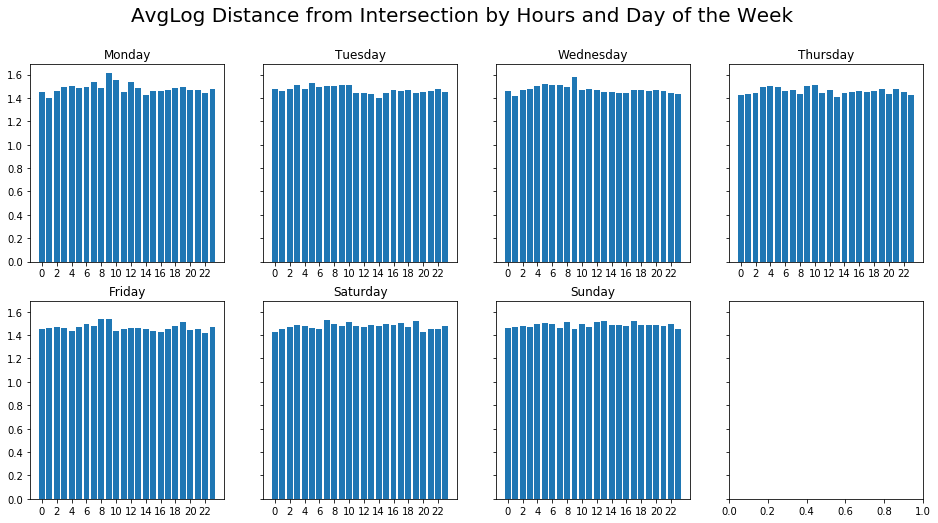

In [51]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="log_off_intersection", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("AvgLog Distance from Intersection by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

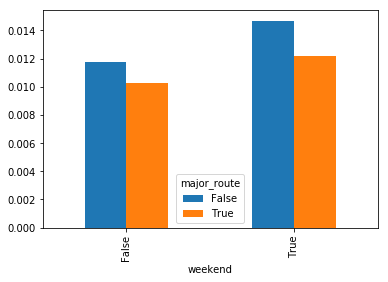

In [52]:
pivot = pd.pivot_table(df_except_five_oclock, index="weekend", columns="major_route", values="SPEEDING_INVOLVED", aggfunc=np.mean)
pivot.plot(kind="bar")

In [53]:
pivot = pd.pivot_table(df_except_five_oclock, index="weekend", columns="major_route", values="SPEEDING_INVOLVED", aggfunc=[np.mean, len])
pivot

mean              len       
major_route     False     True   False  True 
weekend                                      
False        0.011776  0.010269  36175  30284
True         0.014690  0.012208  13274  11550

In [54]:
diff = pivot["mean"][True]-pivot["mean"][False]

In [55]:
p_avg = (pivot["len"][True] * pivot["mean"][True] + pivot["len"][False] * pivot["mean"][False]) / (pivot["len"][True] + pivot["len"][False])

In [56]:
denom = np.sqrt(p_avg * (1-p_avg) * (1/pivot["len"][True] + 1/pivot["len"][False]))

In [57]:
diff / denom

weekend
False   -1.847175
True    -1.688436
dtype: float64

In [58]:
df_merged["license"] = df_merged.LICENSEPLATESTATE
df_merged.loc[np.logical_not(df_merged.license.isin(["DC", "VA", "MD"])), "license"] = "other"

In [59]:
dc = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["DC"]
va = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["VA"]
md = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["MD"]
others = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["other"]

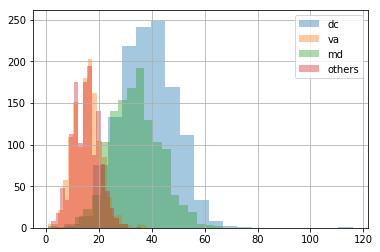

In [60]:
dc.hist(bins=20, alpha=0.4)
va.hist(bins=20, alpha=0.4)
md.hist(bins=20, alpha=0.4)
others.hist(bins=20, alpha=0.4)
plt.legend(["dc", "va", "md", "others"])

In [61]:
stats.ttest_ind(dc, va, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=69.65906177963868, pvalue=0.0)

In [62]:
stats.ttest_ind(dc, md, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=12.027859355807612, pvalue=1.9688635739764907e-32)

In [63]:
stats.ttest_ind(va, md, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=-60.29788634063754, pvalue=0.0)

In [64]:
df_merged.shape

(166403, 79)

In [65]:
df_merged["ticket"] = df_merged.TICKETISSUED == "Y"
df_merged["speeding"] = df_merged.SPEEDING == "Y"
df_merged["impaired"] = df_merged.IMPAIRED == "Y"
df_merged["injury"] = (df_merged.FATAL == "Y") + (df_merged.MAJORINJURY == "Y") + (df_merged.MINORINJURY == "Y")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [66]:
pivot = df_merged.pivot_table(values = ["ticket", "speeding", "impaired", "injury"], columns="license", aggfunc=["mean", "count"])
pivot

mean                                count                     
license         DC        MD        VA     other     DC     MD     VA  other
impaired  0.016797  0.020149  0.021082  0.007231  48758  42781  19827  55037
injury    0.119406  0.143896  0.116659  0.109617  48758  42781  19827  55037
speeding  0.002892  0.003132  0.003783  0.001017  48758  42781  19827  55037
ticket    0.420731  0.441154  0.471428  0.107673  48758  42781  19827  55037

In [67]:
plt.style.use("seaborn")
sns.set_context("talk")
sns.set_style("darkgrid")

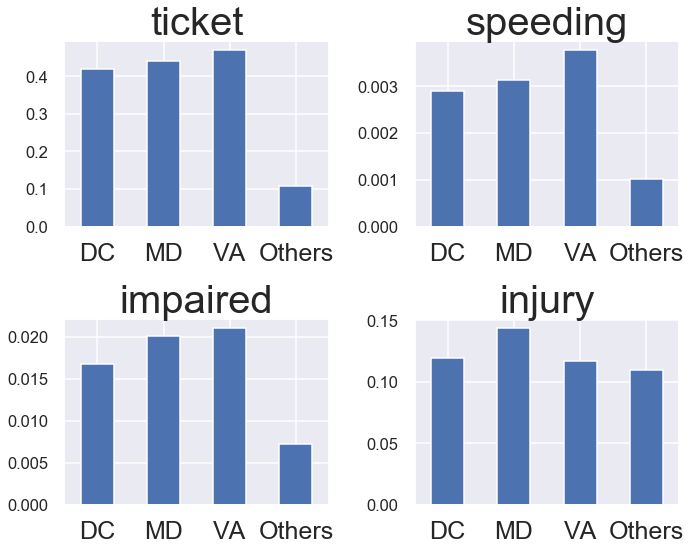

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
for i, topic in enumerate(["ticket", "speeding", "impaired", "injury"]):
    pivot.loc[topic, "mean"].plot(kind="bar", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(topic, size=40)
    axes[i//2, i%2].set_xticklabels(["DC", "MD", "VA", "Others"], fontsize=25, rotation=0)
    axes[i//2, i%2].set_xlabel(xlabel="")

fig.subplots_adjust(hspace=0.3)
plt.tight_layout()
fig.patch.set_alpha(0)

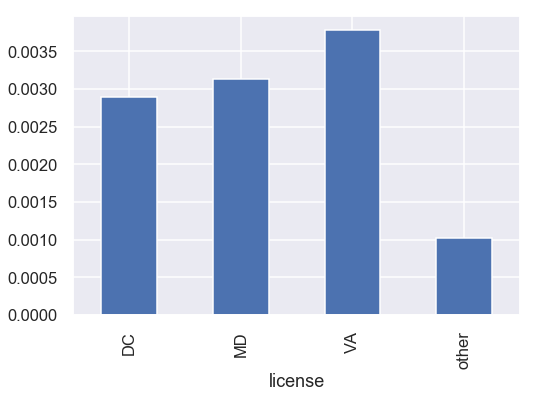

In [69]:
pivot.loc["speeding", "mean"].plot(kind="bar")

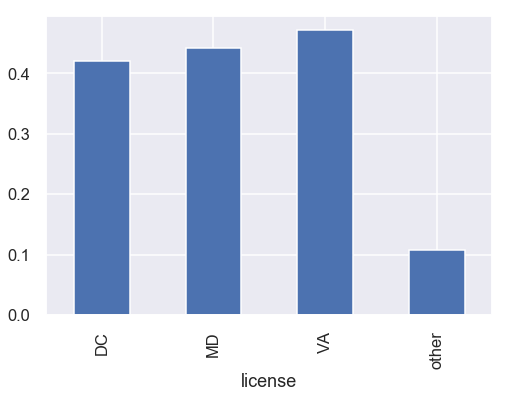

In [70]:
pivot.loc["ticket", "mean"].plot(kind="bar")

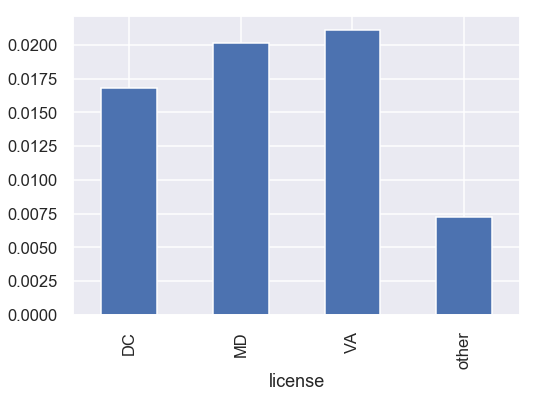

In [71]:
pivot.loc["impaired", "mean"].plot(kind="bar")

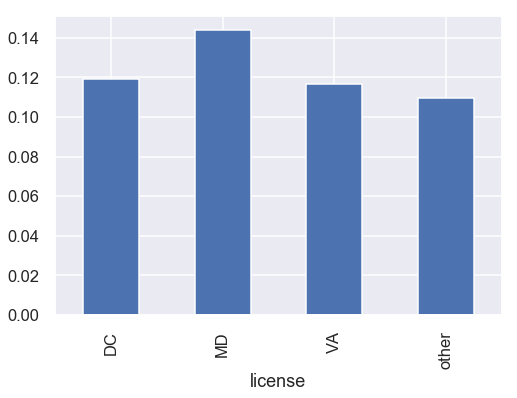

In [72]:
pivot.loc["injury", "mean"].plot(kind="bar")

In [73]:
def prop_test(license1, license2, topic):

    diff = pivot["mean"][license1][topic] - pivot["mean"][license2][topic]
    p_avg = ((pivot["count"][license1][topic] * pivot["mean"][license1][topic] 
              + pivot["count"][license2][topic] * pivot["mean"][license2][topic]) 
             / (pivot["count"][license1][topic] + pivot["count"][license2][topic]))
    denom = np.sqrt(p_avg * (1-p_avg) * (1/pivot["count"][license1][topic] + 1/pivot["count"][license2][topic]))
    z_score = diff / denom
    p_value = stats.norm.sf(abs(z_score))*2
    return "z-score: {}, p-value: {}".format(z_score, p_value)

In [74]:
for topic in ["ticket", "speeding", "impaired", "injury"]:
    for state1 in ["DC", "MD", "VA"]:
        for state2 in ["DC", "MD", "VA"]:
            print(state1, state2, topic)
            print(prop_test(state1, state2, topic))

DC DC ticket
z-score: 0.0, p-value: 1.0
DC MD ticket
z-score: -6.226663500805008, p-value: 4.764729543228784e-10
DC VA ticket
z-score: -12.139619901022813, p-value: 6.512786985557175e-34
MD DC ticket
z-score: 6.226663500805008, p-value: 4.764729543228784e-10
MD MD ticket
z-score: 0.0, p-value: 1.0
MD VA ticket
z-score: -7.082028960977708, p-value: 1.4205895816099442e-12
VA DC ticket
z-score: 12.139619901022813, p-value: 6.512786985557175e-34
VA MD ticket
z-score: 7.082028960977708, p-value: 1.4205895816099442e-12
VA VA ticket
z-score: 0.0, p-value: 1.0
DC DC speeding
z-score: 0.0, p-value: 1.0
DC MD speeding
z-score: -0.663081756824678, p-value: 0.5072781938996525
DC VA speeding
z-score: -1.8876972464012052, p-value: 0.059066606256006786
MD DC speeding
z-score: 0.663081756824678, p-value: 0.5072781938996525
MD MD speeding
z-score: 0.0, p-value: 1.0
MD VA speeding
z-score: -1.312643643204847, p-value: 0.18930305607820808
VA DC speeding
z-score: 1.8876972464012052, p-value: 0.05906660625

In [75]:
prop_test("DC", "VA", "speeding")

'z-score: -1.8876972464012052, p-value: 0.059066606256006786'

In [76]:
prop_test("DC", "VA", "impaired")

'z-score: -3.8228010122287213, p-value: 0.00013194425595713225'

In [77]:
df_merged["va"] = 0
df_merged.loc[df_merged.license=="VA", "va"] = 1
df_merged["md"] = 0
df_merged.loc[df_merged.license=="MD", "md"] = 1
df_merged["dc"] = 0
df_merged.loc[df_merged.license=="DC", "dc"] = 1

df_merged[["va", "md", "dc"]].describe()

,va,md,dc
count,166403.000000,166403.000000,166403.000000
mean,0.119150,0.257093,0.293012
std,0.323966,0.437032,0.455145
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


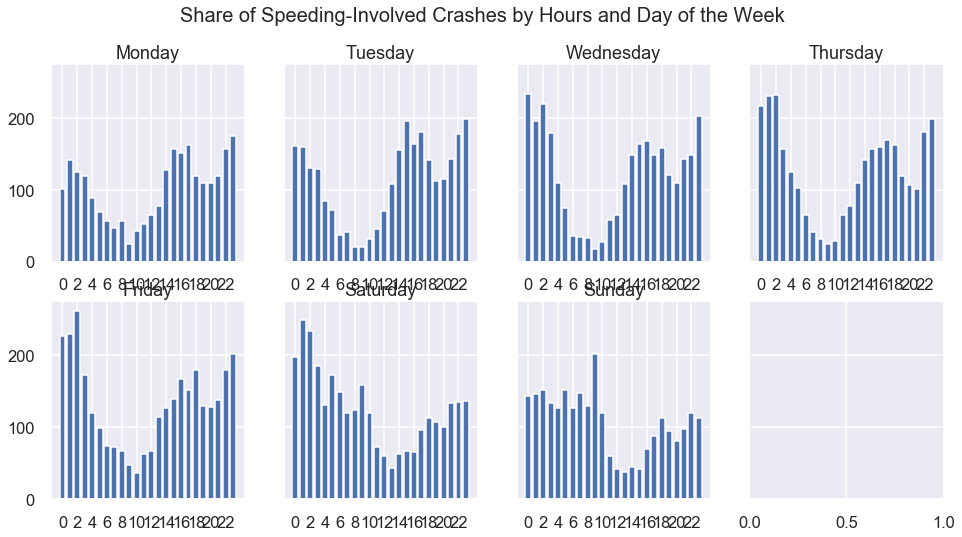

In [78]:
pivot = pd.pivot_table(df_merged, index="report_hour", columns="report_day_of_week", values="va", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

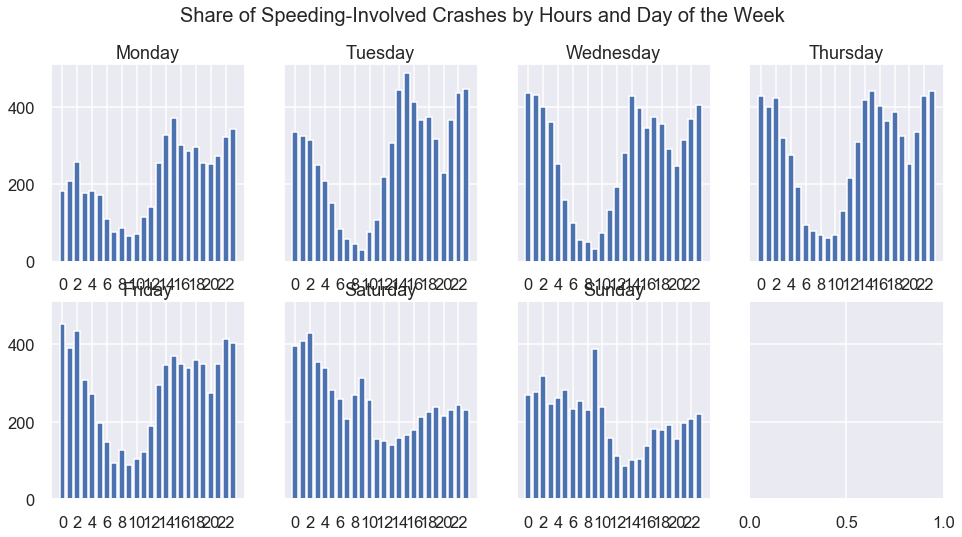

In [79]:
pivot = pd.pivot_table(df_merged, index="report_hour", columns="report_day_of_week", values="md", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

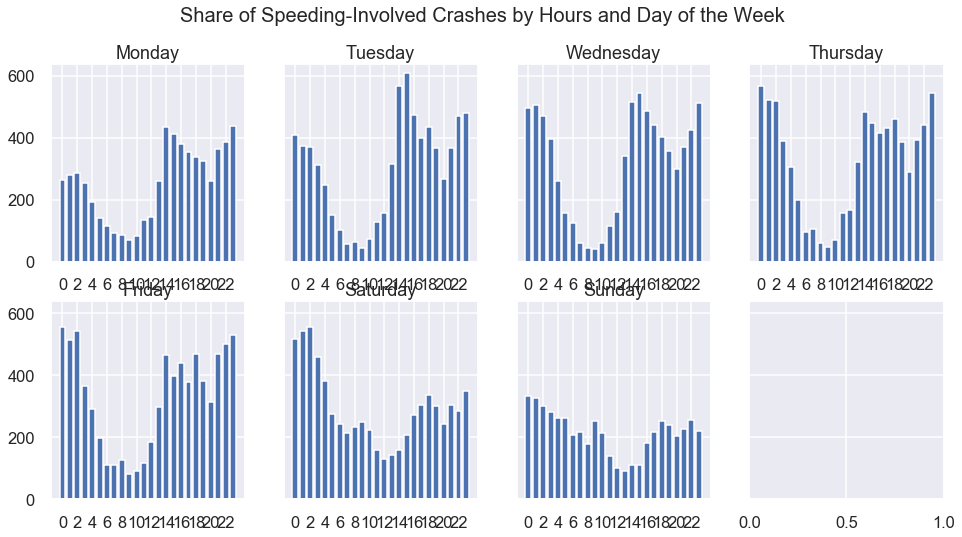

In [80]:
pivot = pd.pivot_table(df_merged, index="report_hour", columns="report_day_of_week", values="dc", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

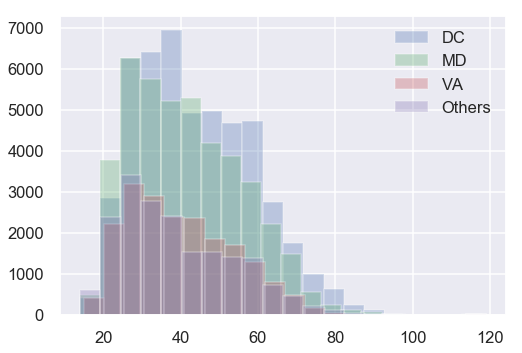

In [81]:
df_merged.groupby("license").AGE.hist(bins=20, alpha=0.3)
plt.legend(["DC", "MD", "VA", "Others"])

In [82]:
stats.ttest_ind(df_merged.loc[df_merged.license=="DC", "AGE"], df_merged.loc[df_merged.license=="MD", "AGE"], equal_var=False)

Ttest_indResult(statistic=24.22515956422271, pvalue=3.114282648567869e-129)

In [83]:
df_person = df_merged.groupby(["license","PERSONID"])[["ticket", "speeding"]].agg(["sum","count"])

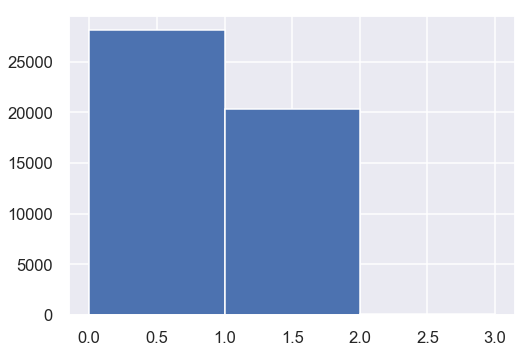

In [84]:
df_person.loc["DC"].ticket["sum"].hist(bins=3)

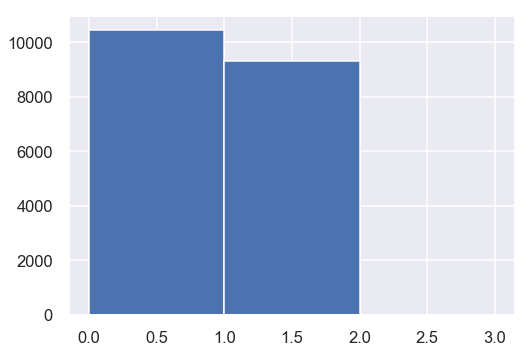

In [85]:
df_person.loc["VA"].ticket["sum"].hist(bins=3)

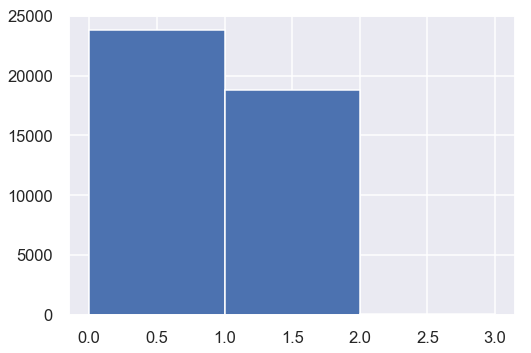

In [86]:
df_person.loc["MD"].ticket["sum"].hist(bins=3)

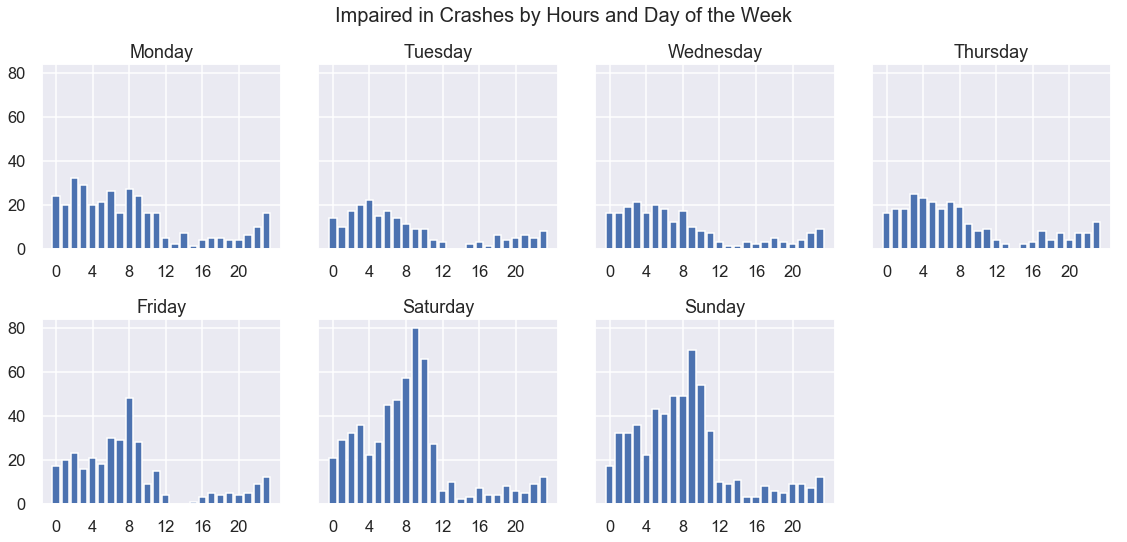

In [87]:
pivot = pd.pivot_table(df_merged, index="report_hour", columns="report_day_of_week", values="impaired", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Impaired in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 4))

ax[1,3].patch.set_visible(False) 
ax[1,3].set_xticks([])
fig.subplots_adjust(hspace=0.2)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.patch.set_alpha(0)

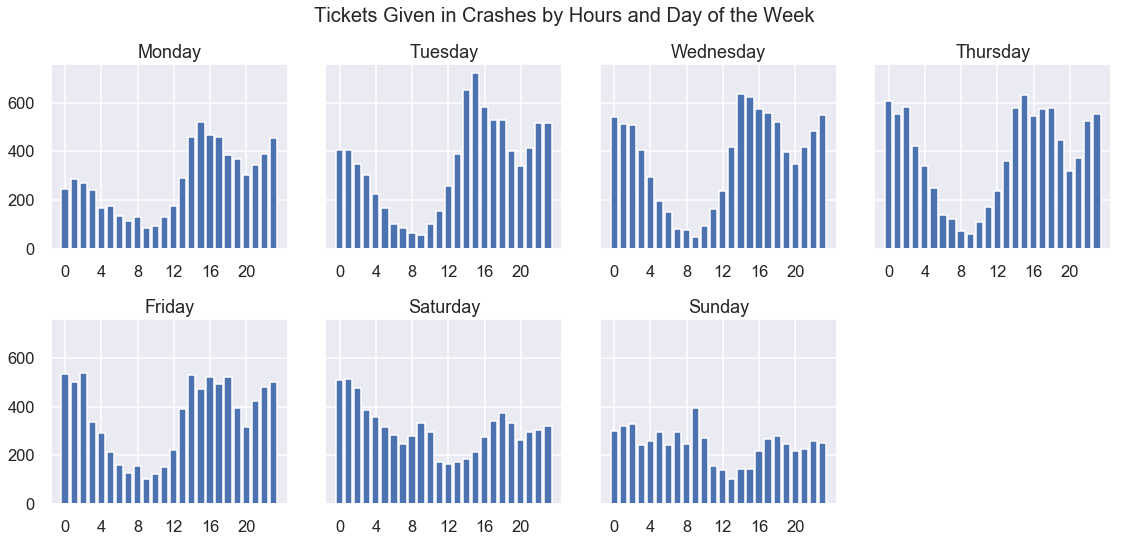

In [88]:
pivot = pd.pivot_table(df_merged, index="report_hour", columns="report_day_of_week", values="ticket", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Tickets Given in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 4))

fig.subplots_adjust(hspace=0.2)
ax[1,3].patch.set_visible(False) 
ax[1,3].set_xticks([])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.patch.set_alpha(0)

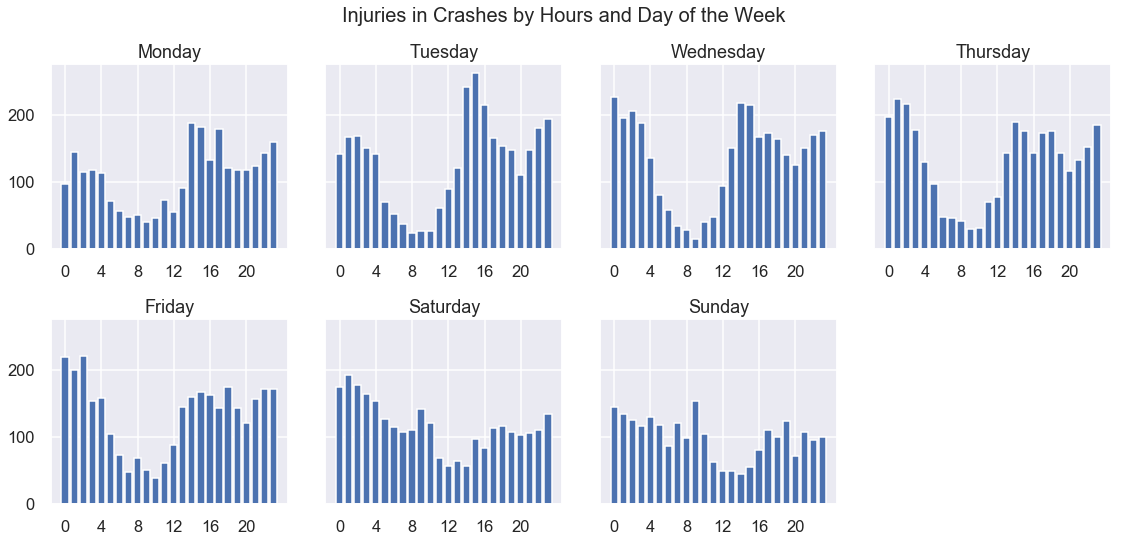

In [89]:
pivot = pd.pivot_table(df_merged, index="report_hour", columns="report_day_of_week", values="injury", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Injuries in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 4))

fig.subplots_adjust(hspace=0.2)
ax[1,3].patch.set_visible(False) 
ax[1,3].set_xticks([])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.patch.set_alpha(0)

In [91]:
df_merged.loc[df_merged.ticket, "speeding"].sum()

287

In [92]:
df_merged.speeding.sum()

406